## Progress Report
<h1 style="font-size: 14px"><I>Team KungFu Pandas: Raj Patel, Ayush Jamindar, Amrita Rajesh, Saloni Mhatre, Lakshmi Krishna</I>

link to the notebook - https://github.com/uic-cs418/group-project-kungfu-pandas/blob/main/Progress_Report.ipynb </h1>
<div><img src= 'https://cdna.artstation.com/p/assets/images/images/037/325/102/medium/haengsook-oh-baby-po.jpg?1620094956' width=100></div>

#### Project Introduction

<h6 style='font-size : 12px'>
We are analyzing two datasets involving Chicago crime and housing. The crime dataset and housing dataset are publicly available at :

- Chicago Crime Data Source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data
- Zillow Data Source: https://www.zillow.com/research/data/

Our inquiries: <i>Which neighborhood is the least safe to move into?, Is there a relationship between housing prices and crime in Chicago?,  Has crime rates increased after post-covid compare to pre-covid?, Most common type of crime committed in Chicago area</i>
</h6>

#### Any Changes
<p style="font-size:12px">
We have added a new dataset to our project: "Housing Dataset". This will provide opportunity for additional analysis such as "is there a relationship between housing prices and crime activity?".
</p>

<h5 style="font-size: 16px">

`IMPORTANT NOTE`: 
</h5>

<h1 style="font-size: 14px">
Please create a folder called `csv_files`. This will contain all the CSV files so after downloading the data, please put it in this folder.



In [1]:
import pandas as pd
import numpy as np
from CleaningPR import *
from ML_pr import *
from Visualization2 import *
from EDA_pr import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#### Data Cleaning Process
<!-- <div><img src= 'https://cdn-icons-png.flaticon.com/512/10179/10179118.png' width=100></div> -->
<h6 style="font-size: 12px">
The following steps are to manipulate and clean the datasets. After obtaining the size, dimensions, and summary of the data, some columns and rows were dropped, more information was added, and dataframes were combined to be stored into seperate CSV files for easy access.  

-The crime dataset contains information about the reported crimes that took place in Chicago from `January 2001` to `February 2024`
- Granularity: Each row in this data represents individual crimes with details about each crime such as ID, Case Number, Date etc.
- Contains `~8 million` records
- First, the dates were converted to a timestamp, then the unecessary columns were dropped such as block, latitide, longitude etc. Next, the data was filtered and then the resulting dataframe was saved into the following seperate CSV files: (`Crimes_2017_to_2019.csv`, `Crimes_2021_to_Present.csv`, `Crimes_2014.csv`)
    </h6>

In [2]:
crime_data = pd.read_csv('csv_files/Crimes_2001_to_Present.csv')

In [3]:
'''
    cleanCrimeData method will perform Step 1,2,3 and 4.
    if want to see the cleaned version of pre-covid, post-covid crime data and decade crime data
    then try opening and printing the head of `Crimes_2017_to_2019.csv`, `Crimes_2021_to_Present.csv`, `Crimes_2014.csv`
'''
cleanCrimeData(crime_data)

Columns:  ['ID', 'New_Date', 'Primary Type', 'Location Description', 'Arrest', 'Community Area', 'RegionName']


<h1 style="font-size: 16px"> Neighborhood Dataset Information and Cleaning </h1>
<h1 style="font-size: 12px">

- The data below is from Zillow and it shows the average house price for each nighborhood in the country
- Granularity: Each row represents a neighborhood in a state and shows the average house price for each month from `1-31-2000` to `1-31-2024`
- Contains average monthly prices for real estate of around `~21000` neighborhoods across the U.S.
- First, the data from Chicago neighborhoods specifically was extracted. Next, the data was transposed by reseting the index, rotating the dataframe to flip the columns and rows and allows for easier manipulation. Finally the dataframe was filtered for pre and post covid and saved into (`neighborhood_data_2017_to_2019.csv`, `neighborhood_data_2021_present.csv`)
</h1 >

In [4]:
neighborhood_data = pd.read_csv('csv_files/Neighborhood_House_Price.csv')

In [5]:
''' cleanHousingData method will perform Step 1,2,and 3. 
    if want to see the cleaned version of pre-covid and post-covid data then 
    try opening and printing the head of `neighborhood_data_2017_to_2019.csv`, `neighborhood_data_2021_present.csv` '''
cleanHousingData(neighborhood_data) 

#### Exploratory Data Analysis
<h6 style="font-size: 14px">Neighborhood Data Exploration</h6>
<h1 style="font-size: 12px ">
Exploring the neighborhood dataset, we seperated the dataset into two CSV files for pre and post Covid.<br>
Between 2017 and 2019, neighborhood prices were like this: the average minimum was about \$ 227,167, and the average maximum was roughly \$ 255,476. Median for the minimum price was \$ 212,369 and for maximum price was \$ 242,843. The cheapest house was in Golden Gate, selling for \$ 25,263 in January 2017, while the most expensive was in North Center, priced at \$ 585,357 in May 2018. In terms of neighborhoods, Golden Gate was the cheapest, averaging about \$ 37,259, while North Center was the most expensive, averaging around \$ 573,486. The month with the most crime commited is July with 73,950 incidents and the month with the least is February with 54,432 incidents.
<br><br>
Since 2021, neighborhood prices have risen slightly, with average minimums around \$ 264,326 and maximums hitting about \$ 299,737. The cheapest house, in Golden Gate, was priced at \$ 55,618 in January 2021, while the most expensive, in North Center, was priced at \$ 696,986 in November 2023. Ford City is the most affordable neighborhood, averaging around \$ 68,129, whereas Ravenswood Manor is the most expensive, averaging approximately \$ 655,319. The month with the most crime commited is January with 70,657 incidents and the month with the least is February with 51,792 incidents.
</h1>
<!-- <div><img src= 'https://cdn-blog.scalablepath.com/uploads/2021/06/exploratory-data-analysis-900x615-1.png' width=100></div> -->

In [6]:
neighborhood_2017_2019 = pd.read_csv('csv_files/neighborhood_data_2017_2019.csv')
neighborhood_2021_present = pd.read_csv('csv_files/neighborhood_data_2021_present.csv')
crime_data1 = pd.read_csv('csv_files/Crimes_2017_to_2019.csv')
crime_data2= pd.read_csv('csv_files/Crimes_2021_to_Present.csv')

In [7]:
# To see the output you can uncomment one by one to see
# get_neighborhood_price_stats(neighborhood_2017_2019)
# get_neighborhood_price_stats(neighborhood_2021_present)

<h6 style="font-size: 14px"> Crime Data Exploration </h6>

<h6 style="font-size: 12px"> For the years 2017-2019, the least common crime type is arson, while the most common is weapons violation. Edison Park had the fewest arrests, totaling 79, whereas Austin had the most, with a staggering 11,443 arrests. For overall crime, Edison Park had the lowest number, with 777 incidents, while Austin had the highest, with 44,856 incidents. The top five locations for crime include streets with 174,926 incidents, residences with 131,615 incidents, apartments with 101,710 incidents, sidewalks with 62,242 incidents, and other locations with 31,925 incidents. On the other hand, the top five locations with the least crime each had only one incident: YMCA, railroad property, rooming house, office, and nursing home.
<br><br>
From 2021 onwards, The least common crime is arson, while the most common is weapons violation. Edison Park had the fewest arrests, totaling 63, while Austin had the most, with 5,743 arrests. For overall crime, Edison Park had the lowest number, with 838 incidents, while Austin had the highest, with 37,281 incidents. The top five locations for crime include streets with 203,027 incidents, apartments with 141,976 incidents, residences with 95,109 incidents, sidewalks with 37,672 incidents, and parking lots/garages (non-residential) with 26,416 incidents. On the other hand, the top five locations with the least crime each had only one incident: farm, banquet hall, CTA subway station, elevator, and basement.
</h6>



In [8]:
# These are the EDA functions which contain the code, feel free to uncomment and run them :)
# get_crime_stats(crime_data1)
# get_crime_stats(crime_data2)

<h3><i>Theft and Battery are the most frequently committed crimes</i></h3>
<!-- <div><img src= 'https://media.sproutsocial.com/uploads/2023/10/Data-Visualization-Final.jpg' width=100></div> -->

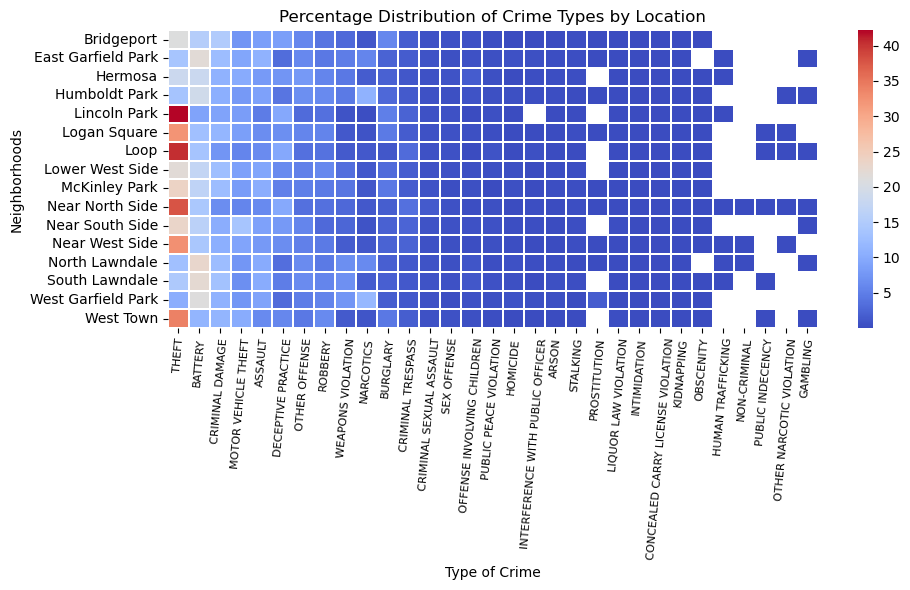

In [9]:
visualization2()

<h1 style="font-size: 14px"> Findings</h1>
<h1 style="font-size: 12px"> This heatmap looks at frequency of crime in different neighborhoods. Neighborhoods are ordered by proximity from UIC outward. Type of crime was organized by calculating proportions of each type to total number of crimes and then ordering by frequency of crime. This visualization shows that theft, battery and crimimal damage are the most common forms of crime. Lincoln Park, the Loop, and Near North Side especially have high rates of theft. This helps answer our inquiries about `Which neighborhood is the least safe to move into near UIC? and `Most common type of crime committed in Chicago area` 
</h1>

#### Machine Learning
<h1 style="font-size: 12px">
We began by splitting the decade crime data from crime_data_2014.csv into training and testing sets to ensure we didn't touch the testing data initially. Next, we determined the best feature(s) for predicting arrest probability using logistic regression. This involved encoding string variables into 0s and 1s for easier model fitting, employing k-fold cross-validation to evaluate model performance, and ultimately selecting the feature combination yielding the highest accuracy.
<br><br>
Comparing our logistic regression model, which incorporates Primary Type, Location Description, and RegionName, against a baseline model using mode prediction, we found an 87% accuracy improvement with the logistic regression model.

Then, we trained the LogisticRegression Model using the best feature determined earlier on the same training set, avoiding the creation of a new one. This involved training the model, testing it, and creating a new dataframe for further analysis.

</h1>



In [10]:
crime_data_2014 = pd.read_csv('csv_files/Crimes_2014.csv')
'''
    Step 1: Spliting
'''
X = crime_data_2014[['Primary Type', 'Location Description', 'RegionName']]
y = crime_data_2014['Arrest'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing
print("length of the training dataset",len(X_train))

'''
    best_feature method will perform step 2 and 3
'''
feature = best_feature(crime_data_2014, X_train, y_train)

''' train_test method will perform step 4 '''
train_test(X_train, X_test, y_train, y_test, feature) # Uses Logistic Regression Model to train and test our model


length of the training dataset 2008524
Best Features ['Primary Type', 'Location Description', 'RegionName'] Accuracy of Logistic Regression:  0.8786626398290486
Accuracy of the baseline model:  0.8083941242424786
Accuracy of the model on the test dataset: 0.8786813029243307


,Primary Type,Location Description,RegionName,Prob
2178855,THEFT,SIDEWALK,Loop,0.071569
1869478,ASSAULT,ALLEY,Lake View,0.112263
1299827,THEFT,SIDEWALK,Englewood,0.076977
1024670,THEFT,SIDEWALK,West Town,0.054855
229033,BATTERY,STREET,Near South Side,0.200903


<b>Step 5</b>: Model Usage

<h1 style="font-size:12px">

Firstly we trained our model using the crime data from the past decade(2014-present) so that it can learn as much as possible. Then our stakeholder `Residents of Chicago, UIC students, new settlers and Chicago Police Department` can predict the probabilty of a person getting arrested based on the type of crime, neighborhood, and description of the location. This will be beneficial to determine how safe a neighborhood is. Our model will not give 100% accuracy on the prediction but it will predict the outcome 87.86% of the time correctly, this is significant becuase our model is not overfitting. In other terms, it be able to predict almost 9 out of 10 outcomes correctly. </h1>

#### Reflection
<h1 style="font-size: 12px">

- The hardest part of this project was to understand the data, clean the data and how we can the housing dataset and crime dataset to come up with hypothesis. Second hardest part was to determine how our Machine Learning model can be useful to the stakeholder because ML model gives us the prediction, it's us who will determine how we can use it to solve our problem.

- Our initial insight is that the crime in Chicago has stayed the same pre and post covid but the neighborhoods of where the crimes are happening is changing. 

- Yes, our visualization shows that theft and battery are the most frequently committed type of crime and that Lincoln Park, the Loop and Near North Side are the least safe neighborhoods.

- The biggest problem we are facing is the merging of Housing Dataset and Crime Dataset since there are some neighborhoods which are in Housing Data but not in the Crime dataset while there are some neighborhoods which are in Crime Dataset but not in Housing Dataset. Also, accquiring the population for each neighborhood for each year will be difficult since it is only only once every decade.

- Yes, we set a personal due date for this project progess report and we managed to finished all the parts efficiently. We are fully on track!

- Yes, because we have all the necessary information to do ML/Stat analysis, Test our hypothesis, and come up with interesting findings and more.
</h1>

#### Next Step
<!-- <div><img src= 'https://www.pocketmindfulness.com/wp-content/uploads/2017/03/baby-steps-approach.jpg' width=100></div> -->
<h1 style = "font-size: 12px">

<i>What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.<i>
- We are planning to do a T-Test on our hypothesis `There has been increase in crime after post covid` and to decide whether to reject or fail to reject the null hypothesis to determine significance. We will try to create another ML model where we will include the neighborhood average housing price to predict the chances of offender being arrested. On top of this, we will also try to discover more interesting finding using visualization with the help of our EDA

- We will `split the work` accordingly amongs the team member using GitHub Kanban board so there is a nice workflow and line of communication. We will also set a `personal due date` about a week before the actual project due date so we can resolve any loose-ends
</h1>

<H2><I>END OF PROGRESS REPORT<I><H2>

<img src="https://i.pinimg.com/564x/a9/b4/d4/a9b4d4ef2f85697b546760a1d8da4bcc.jpg" width=350px>